In [9]:
import json
from pathlib import Path

import matplotlib.pyplot as plt

metric_files = {
    "base_qrl": "/home/hkppp/Classes/naht/naht_results/mpe-pp/open_train/poam-qrl_open_baselines/sacred/poam_baseline_seed=112358_11-29-03-34-29/1/metrics.json",
    "mod_qrl": "/home/hkppp/Classes/naht/naht_results/mpe-pp/open_train/poam-qrl_open/sacred/poam_baseline_seed=112358_12-02-02-56-04/1/metrics.json", # modified qrl run
    "poam_base": "/home/hkppp/Classes/naht/naht_results/mpe-pp/open_train/poam-pqvmq_open/sacred/poam_baseline_seed=112358_12-02-11-36-28/1/metrics.json"
}
    


all_runs = {}

for label, path_str in metric_files.items():
    path = Path(path_str)
    with path.open() as f:
        metrics = json.load(f)
    all_runs[label] = metrics

all_runs.keys()

dict_keys(['base_qrl', 'mod_qrl', 'poam_base'])

In [10]:
import matplotlib.pyplot as plt

def plot_metric_across_runs(metric_name, runs_dict, clip_to_min_steps=False):
    """
    Plot one metric across multiple runs on the same graph.
    
    runs_dict: {run_label: metrics_dict}
    metrics_dict[metric_name] is expected to look like:
        {
            "steps": [...],
            "values": [...]
        }
    """
    plt.figure()

    min_steps = None
    if clip_to_min_steps:
        # Collect valid lengths across runs that actually have this metric
        lengths = []
        for metrics in runs_dict.values():
            metric = metrics.get(metric_name)
            if metric is None:
                continue
            steps = metric["steps"]
            values = metric["values"]
            # In case steps/values lengths differ, be safe and take the shorter one
            lengths.append(min(len(steps), len(values)))
        
        if not lengths:
            print(f"No run contains metric '{metric_name}'")
            plt.close()
            return
        
        min_steps = min(lengths)

    found_any = False
    for run_label, metrics in runs_dict.items():
        if metric_name not in metrics:
            continue  # this run doesn't have that metric
        
        steps = metrics[metric_name]["steps"]
        values = metrics[metric_name]["values"]

        if clip_to_min_steps:
            steps = steps[:min_steps]
            values = values[:min_steps]

        plt.plot(steps, values, marker="o", label=run_label)
        found_any = True
    
    if not found_any:
        print(f"No run contains metric '{metric_name}'")
        plt.close()
        return
    
    plt.xlabel("Steps")
    plt.ylabel(metric_name)
    plt.title(metric_name)
    plt.grid(True)
    plt.legend()
    plt.show()


In [11]:
# Collect all metric names that appear in any run
all_metric_names = set()
for metrics in all_runs.values():
    all_metric_names.update(metrics.keys())

sorted(all_metric_names)


['actor_grad_norm',
 'actor_loss',
 'advantage_mean',
 'critic_grad_norm',
 'critic_loss',
 'curr_taken_v',
 'ed_act_loss',
 'ed_grad_norm',
 'ed_loss',
 'ed_obs_loss',
 'entropy',
 'episode',
 'log_pi_taken',
 'old_values_mean',
 'ratio',
 'target_mean',
 'td_error_abs',
 'test_ep_length_mean',
 'test_return_mean',
 'test_return_std',
 'train_ep_length_mean',
 'train_return_mean',
 'train_return_std']

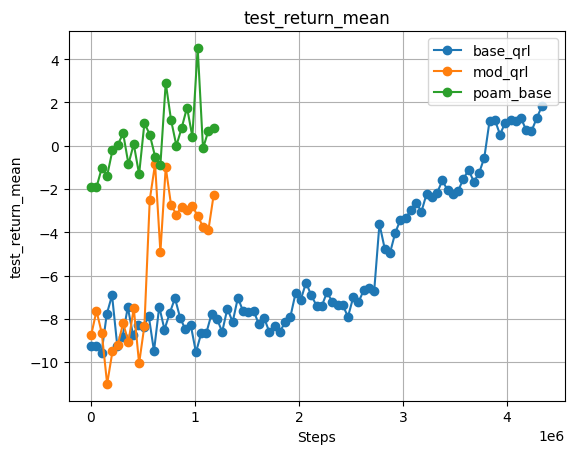

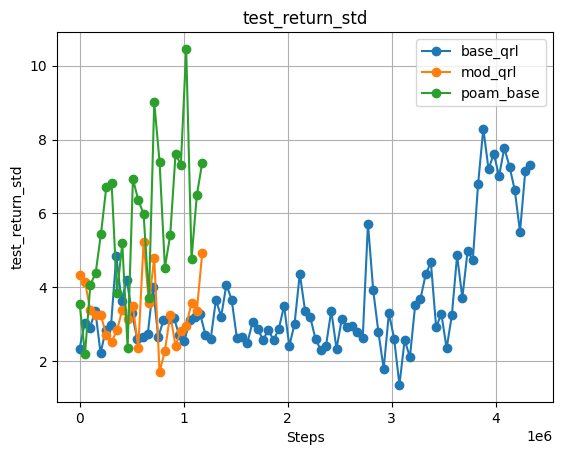

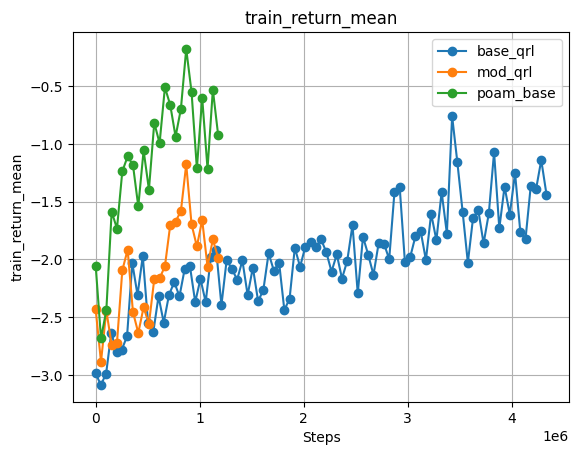

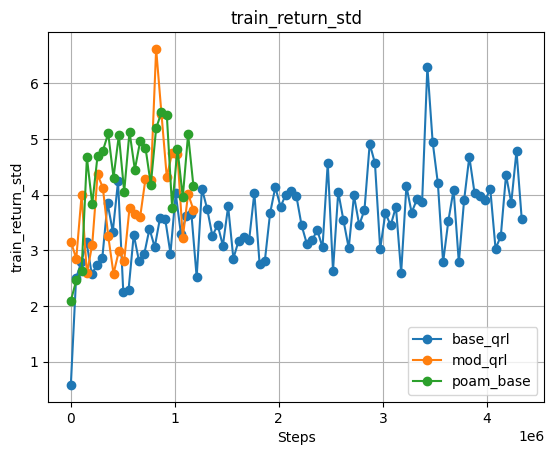

In [ ]:
# Plot each metric across runs
selected_metric_names = ['test_return_mean', 'test_return_std', 'train_return_mean', 'train_return_std']
for metric_name in sorted(selected_metric_names):
    plot_metric_across_runs(metric_name, all_runs, clip_to_min_steps=True)
